In [36]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
sns.set_context("paper")

In [37]:
pd.__version__

'1.0.3'

In [127]:
#csv_dir = "../pseudomonas_testset/output.pseudomonas_compare/compare_CompleteGenome/"
csv_dir = "../pseudomonas_testset/output.pseudomonas_compare/compare/"

In [128]:
dna_csvs = glob.glob(csv_dir + "pseudomonas.genomic*anchor*csv.gz")
protein_csvs = glob.glob(csv_dir + "pseudomonas.protein*anchor*csv.gz")

In [129]:
dna_csvs

['../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.dayhoff-k18.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.hp-k37.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.hp-k35.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.hp-k33.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.protein-k12.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.dayhoff-k16.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.protein-k8.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.hp-k39.anchor-compare.csv.gz',
 '../pseudomonas_testset/output.pseudomonas_compare/compare/pseudomonas.genomic.protein-k10.a

In [130]:
genomicDF = pd.concat([pd.read_csv(csv, sep=",") for csv in dna_csvs])
proteinDF = pd.concat([pd.read_csv(csv, sep=",") for csv in protein_csvs])

In [131]:
genomicDF

,comparison_name,comparison_level,alphabet,ksize,scaled,jaccard,max_containment,anchor_hashes,query_hashes,num_common
0,GCF_004124255.1__x__GCF_001036355.1,genus,dayhoff,18,100,0.003146,0.013841,36846,125769,510
1,GCF_004124255.1__x__GCF_012986535.1,genus,dayhoff,18,100,0.006280,0.028497,36846,131412,1050
2,GCF_004124255.1__x__GCF_012986525.1,genus,dayhoff,18,100,0.006219,0.028416,36846,132544,1047
3,GCF_004124255.1__x__GCF_012986465.1,genus,dayhoff,18,100,0.006165,0.028497,36846,134507,1050
4,GCF_004124255.1__x__GCF_009498775.1,genus,dayhoff,18,100,0.006613,0.028470,36846,122822,1049
...,...,...,...,...,...,...,...,...,...,...
19650,GCF_016337345.1__x__GCF_014062085.1,species,dayhoff,17,100,0.553447,0.755574,107145,120087,80956
19651,GCF_902807105.1__x__GCF_003975605.1,species,dayhoff,17,100,0.571807,0.752242,133579,125098,94104
19652,GCF_016337345.1__x__GCF_009932375.1,species,dayhoff,17,100,0.472488,0.658062,107145,112590,70508
19653,GCF_902807105.1__x__GCF_003975615.1,species,dayhoff,17,100,0.540935,0.712762,133579,137641,95210


In [132]:
genomicDF["alpha-ksize"] = genomicDF["alphabet"] + "-" + genomicDF["ksize"].astype(str)
proteinDF["alpha-ksize"] = proteinDF["alphabet"] + "-" + proteinDF["ksize"].astype(str)


In [133]:
proteinDF

,comparison_name,comparison_level,alphabet,ksize,scaled,jaccard,max_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCF_004124255.1__x__GCF_001036355.1,genus,hp,42,100,0.008271,0.064342,2409,16487,155,hp-42
1,GCF_004124255.1__x__GCF_012986535.1,genus,hp,42,100,0.017954,0.139477,2409,16641,336,hp-42
2,GCF_004124255.1__x__GCF_012986525.1,genus,hp,42,100,0.017547,0.138232,2409,16902,333,hp-42
3,GCF_004124255.1__x__GCF_012986465.1,genus,hp,42,100,0.017352,0.138647,2409,17173,334,hp-42
4,GCF_004124255.1__x__GCF_009498775.1,genus,hp,42,100,0.018704,0.135741,2409,15401,327,hp-42
...,...,...,...,...,...,...,...,...,...,...,...
19650,GCF_016337345.1__x__GCF_014062085.1,species,hp,35,100,0.670535,0.850085,14068,15726,11959,hp-35
19651,GCF_902807105.1__x__GCF_003975605.1,species,hp,35,100,0.731556,0.873392,18006,16871,14735,hp-35
19652,GCF_016337345.1__x__GCF_009932375.1,species,hp,35,100,0.637065,0.798052,14068,14782,11227,hp-35
19653,GCF_902807105.1__x__GCF_003975615.1,species,hp,35,100,0.681095,0.817950,18006,18346,14728,hp-35


In [215]:
#dayhoff_rankinfo = dayhoff.groupby("rank", "alphabet")['num_lca_kmers'].agg('sum')
#rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
rankorder = ["species", "genus"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
prot_order = ["protein-7", "protein-8", "protein-9", "protein-10", "protein-11", "protein-12"]
dayhoff_order = ["dayhoff-15", "dayhoff-16", "dayhoff-17", "dayhoff-18", "dayhoff-19"]
hp_order = ["hp-33", "hp-35", "hp-37", "hp-39", "hp-42"]

alphak_order = nucl_order + prot_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}
pnlong_colors2 = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}

### need to add colors here!
protein_colors = {"protein-7": "#a1d99b", "protein-8": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c", "protein-12": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-16": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-18": "#9e9ac8","dayhoff-19": "#54278f"}
hp_colors = {"hp-33": "#6baed6", "hp-35": "#3182bd", "hp-37": "#08519c", "hp-39": "#08519c", "hp-42": "#08519c"}

pnfull_colors = nucl_colors
pnfull_colors.update(protein_colors)

alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)
alphak_colors.update(dayhoff_colors)
alphak_colors.update(hp_colors)

protday_colors = protein_colors
protday_colors.update(dayhoff_colors)
protday_order = prot_order +dayhoff_order

allprot_colors = protday_colors
allprot_colors.update(hp_colors)
allprot_order = protday_order + hp_order

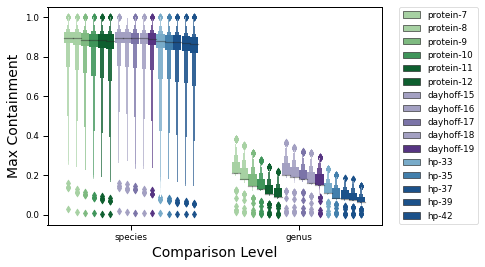

In [135]:
g=sns.boxenplot(data=proteinDF, x="comparison_level", y="max_containment",hue="alpha-ksize", palette=allprot_colors, order=rankorder, hue_order=allprot_order)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()
#fig.savefig("anchor-containment.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

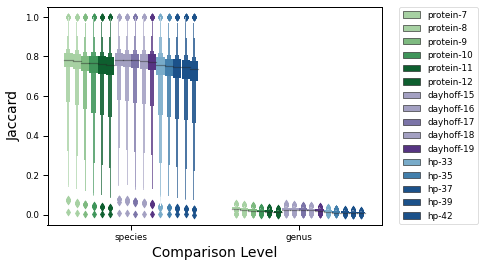

In [136]:


g=sns.boxenplot(data=proteinDF, x="comparison_level", y="jaccard",hue="alpha-ksize", palette=allprot_colors, order=rankorder, hue_order=allprot_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()


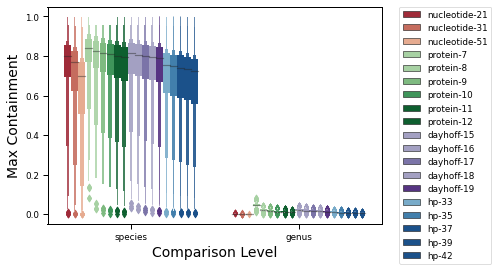

In [137]:
g=sns.boxenplot(data=genomicDF, x="comparison_level", y="max_containment",hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

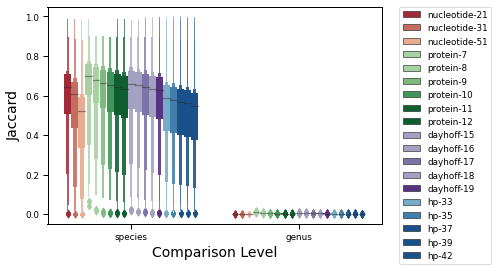

In [138]:
g=sns.boxenplot(data=genomicDF, x="comparison_level", y="jaccard",hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()

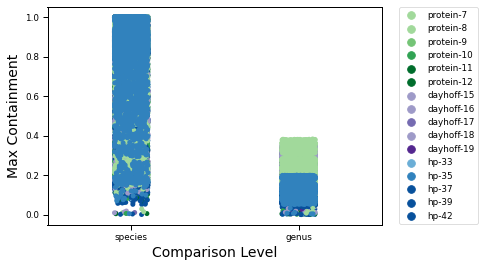

In [139]:
g=sns.stripplot(data=proteinDF, x="comparison_level", y="max_containment",hue="alpha-ksize", palette=allprot_colors, order=rankorder, hue_order=allprot_order) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()
#fig.savefig("anchor-containment.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

Text(789.156450720293, 0.5, 'Max Containment')

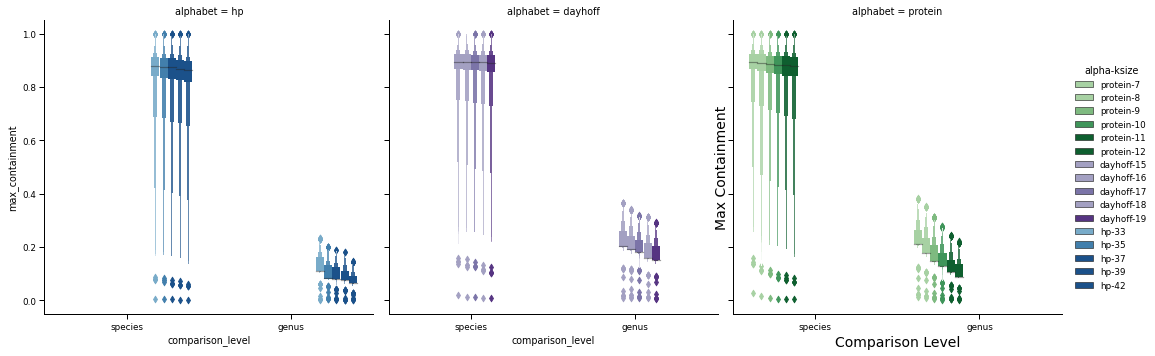

In [140]:
g=sns.catplot(data=proteinDF, kind="boxen", x="comparison_level", y="max_containment",hue="alpha-ksize", palette=allprot_colors, order=rankorder, hue_order=allprot_order, col="alphabet")
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
#fig = g.get_figure()

Text(1161.8105555429688, 0.5, 'Max Containment')

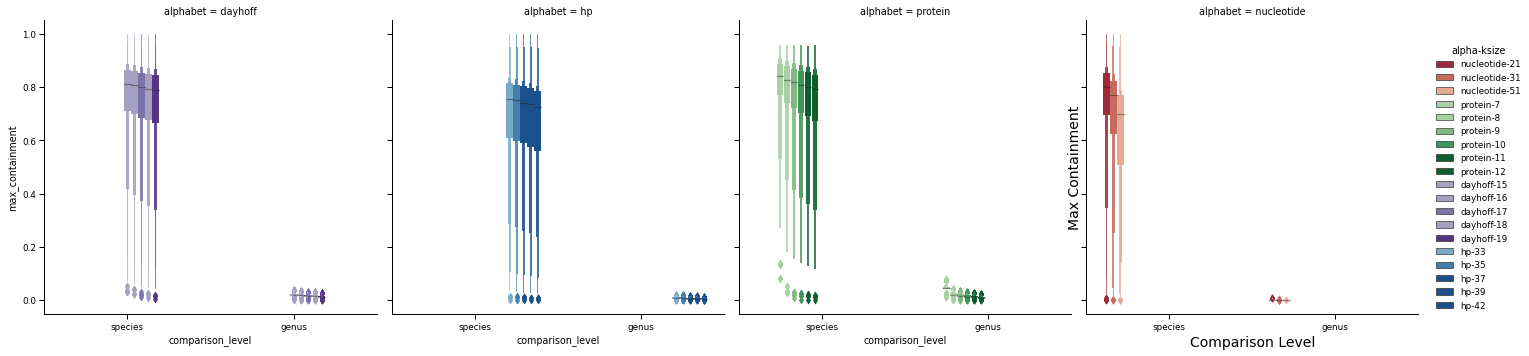

In [141]:
g=sns.catplot(data=genomicDF, kind="boxen", x="comparison_level", y="max_containment",hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order, col="alphabet") #palette="GnBu_d"
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)

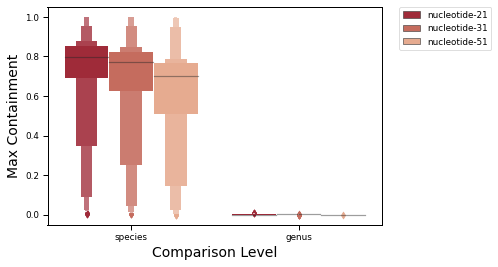

In [142]:
g=sns.boxenplot(data=genomicDF[genomicDF["alphabet"] == "nucleotide"], x="comparison_level", y="max_containment",hue="alpha-ksize", palette=nucl_colors, order=rankorder, hue_order=nucl_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

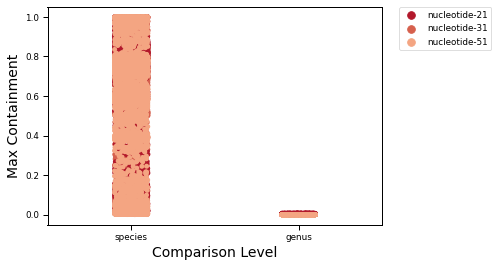

In [143]:
g=sns.stripplot(data=genomicDF[genomicDF["alphabet"] == "nucleotide"], x="comparison_level", y="max_containment",hue="alpha-ksize", palette=nucl_colors, order=rankorder, hue_order=nucl_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

Text(731.556, 0.5, 'Max Containment')

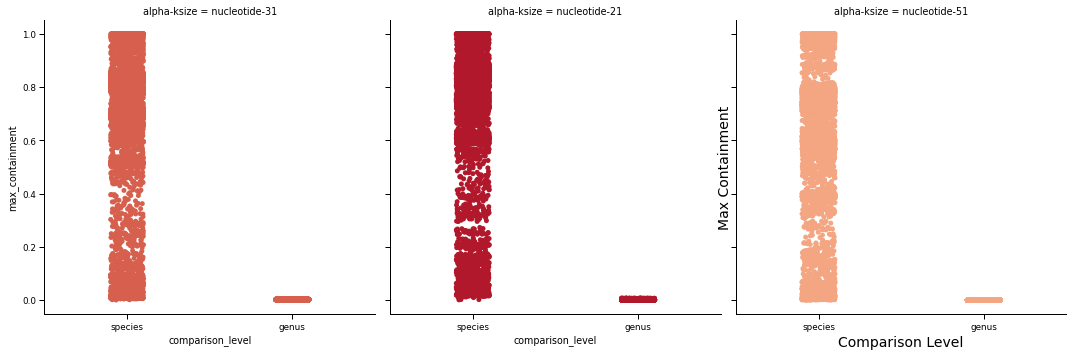

In [144]:
g=sns.catplot(data=genomicDF[genomicDF["alphabet"] == "nucleotide"], kind="strip", x="comparison_level", y="max_containment",hue="alpha-ksize", palette=nucl_colors, order=rankorder, hue_order=nucl_order, col="alpha-ksize") #palette="GnBu_d"
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)

Text(731.556, 0.5, 'Max Containment')

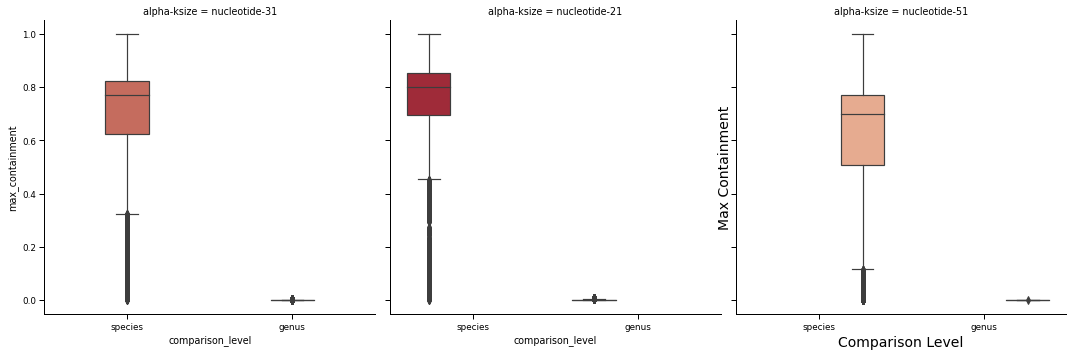

In [145]:
g=sns.catplot(data=genomicDF[genomicDF["alphabet"] == "nucleotide"], kind="box", x="comparison_level", y="max_containment",hue="alpha-ksize", palette=nucl_colors, order=rankorder, hue_order=nucl_order, col="alpha-ksize") #palette="GnBu_d"
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)

Text(1807.2779999999998, 0.5, 'Max Containment')

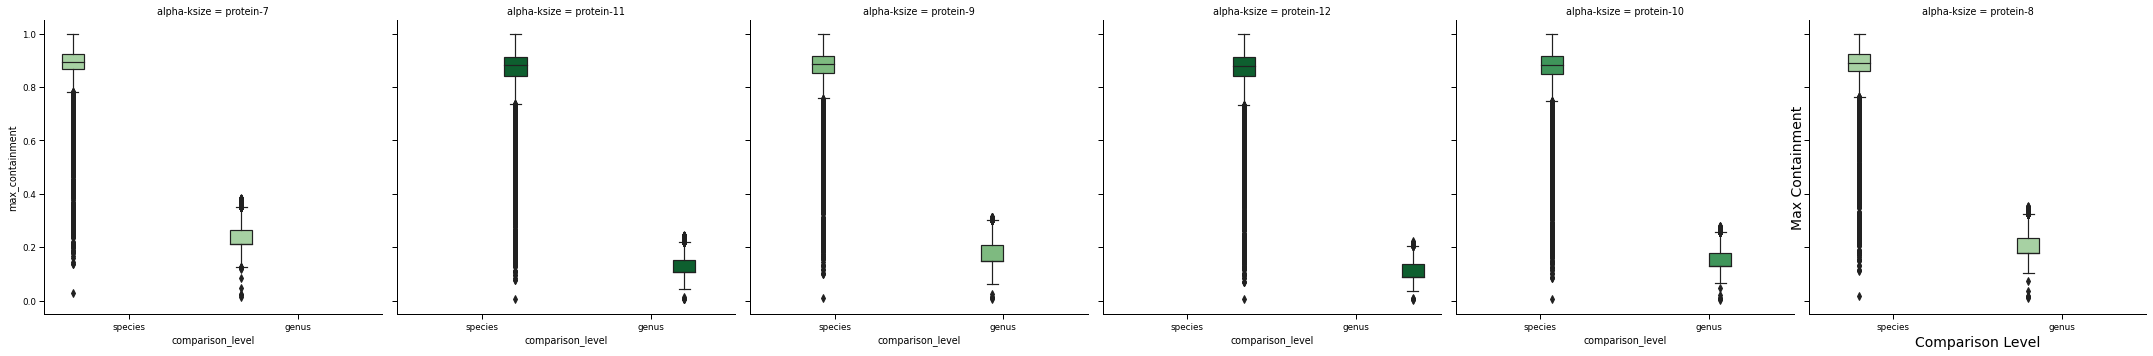

In [146]:
g=sns.catplot(data=proteinDF[proteinDF["alphabet"] == "protein"], kind="box", x="comparison_level", y="max_containment",hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=prot_order, col="alpha-ksize") #palette="GnBu_d"
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)

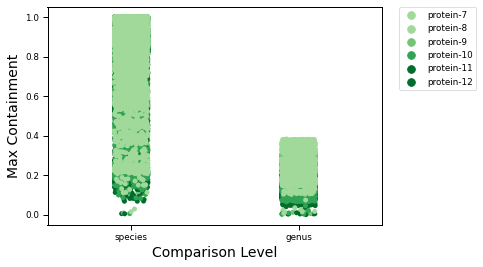

In [147]:
g=sns.stripplot(data=proteinDF[proteinDF["alphabet"] == "protein"], x="comparison_level", y="max_containment",hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=prot_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

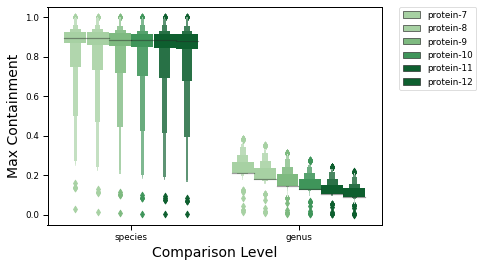

In [148]:
g=sns.boxenplot(data=proteinDF[proteinDF["alphabet"] == "protein"], x="comparison_level", y="max_containment",hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=prot_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

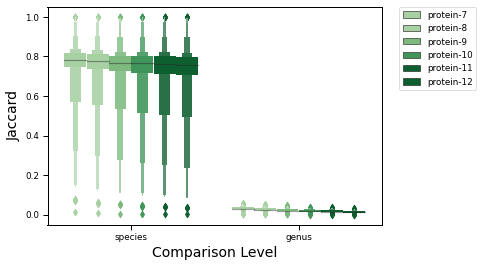

In [149]:
g=sns.boxenplot(data=proteinDF[proteinDF["alphabet"] == "protein"], x="comparison_level", y="jaccard",hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=prot_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()

In [150]:
nucl_only = genomicDF[genomicDF["alphabet"] == "nucleotide"]
prot_only = proteinDF[proteinDF["alphabet"] == "protein"]
nucl_prot = pd.concat([nucl_only, prot_only])

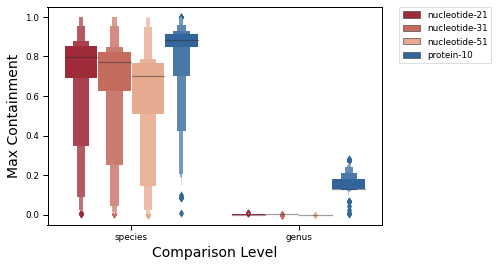

In [151]:
g=sns.boxenplot(data=nucl_prot, x="comparison_level", y="max_containment",hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors.keys()) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Max Containment", size=14)
fig = g.get_figure()

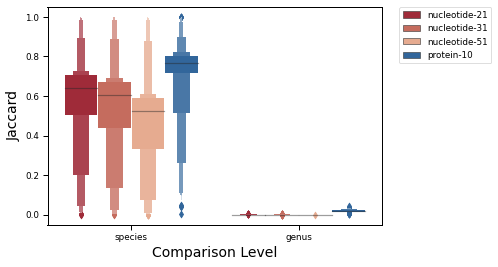

In [152]:
g=sns.boxenplot(data=nucl_prot, x="comparison_level", y="jaccard",hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors.keys()) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Comparison Level", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()

In [153]:
nucl_prot

,comparison_name,comparison_level,alphabet,ksize,scaled,jaccard,max_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCF_004124255.1__x__GCF_001036355.1,genus,nucleotide,31,1000,0.000483,0.002231,1793,6500,4,nucleotide-31
1,GCF_004124255.1__x__GCF_012986535.1,genus,nucleotide,31,1000,0.000486,0.002231,1793,6448,4,nucleotide-31
2,GCF_004124255.1__x__GCF_012986525.1,genus,nucleotide,31,1000,0.000484,0.002231,1793,6479,4,nucleotide-31
3,GCF_004124255.1__x__GCF_012986465.1,genus,nucleotide,31,1000,0.000479,0.002231,1793,6565,4,nucleotide-31
4,GCF_004124255.1__x__GCF_009498775.1,genus,nucleotide,31,1000,0.000645,0.002789,1793,5959,5,nucleotide-31
...,...,...,...,...,...,...,...,...,...,...,...
19650,GCF_016337345.1__x__GCF_014062085.1,species,protein,8,100,0.684861,0.860796,15057,16829,12961,protein-8
19651,GCF_902807105.1__x__GCF_003975605.1,species,protein,8,100,0.766315,0.895651,19677,18486,16557,protein-8
19652,GCF_016337345.1__x__GCF_009932375.1,species,protein,8,100,0.651473,0.813509,15057,15994,12249,protein-8
19653,GCF_902807105.1__x__GCF_003975615.1,species,protein,8,100,0.716132,0.844895,19677,20163,16625,protein-8


In [154]:
nuclprotMelt=pd.melt(nucl_prot, id_vars=["comparison_name", "comparison_level", "ksize", "alphabet", "scaled", "alpha-ksize"], 
                    value_vars=["jaccard", "max_containment"],
                    var_name='comparison_type', value_name='comparison_value')

In [155]:
nuclprotMelt

,comparison_name,comparison_level,ksize,alphabet,scaled,alpha-ksize,comparison_type,comparison_value
0,GCF_004124255.1__x__GCF_001036355.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000483
1,GCF_004124255.1__x__GCF_012986535.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000486
2,GCF_004124255.1__x__GCF_012986525.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000484
3,GCF_004124255.1__x__GCF_012986465.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000479
4,GCF_004124255.1__x__GCF_009498775.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000645
...,...,...,...,...,...,...,...,...
353785,GCF_016337345.1__x__GCF_014062085.1,species,8,protein,100,protein-8,max_containment,0.860796
353786,GCF_902807105.1__x__GCF_003975605.1,species,8,protein,100,protein-8,max_containment,0.895651
353787,GCF_016337345.1__x__GCF_009932375.1,species,8,protein,100,protein-8,max_containment,0.813509
353788,GCF_902807105.1__x__GCF_003975615.1,species,8,protein,100,protein-8,max_containment,0.844895


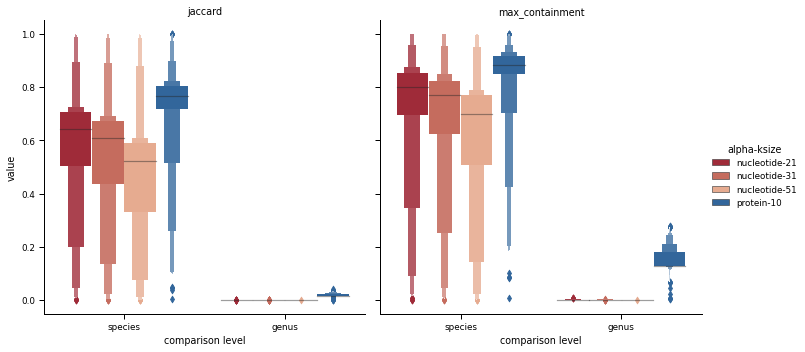

In [205]:
g=sns.catplot(data=nuclprotMelt, kind="boxen", x="comparison_level", y="comparison_value",hue="alpha-ksize", col= "comparison_type",palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors.keys()) #palette="GnBu_d"
g.set_titles("{col_name}")
g.set_axis_labels("comparison level", "value")
#lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel("Comparison Level", size=14)
#plt.ylabel("Jaccard", size=14)
#fig = g.get_figure()

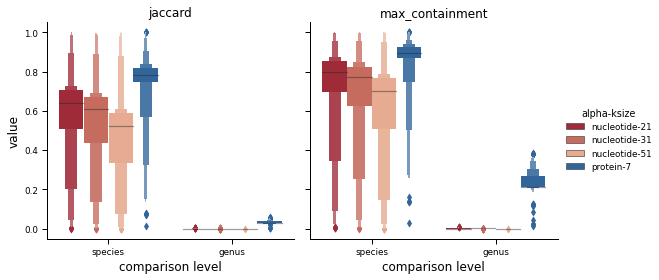

In [210]:
allprotnucl_colors = nucl_colors
allprotnucl_colors.update(protein_colors)
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12}):
    g = sns.catplot(data=nuclprotMelt,kind="boxen",x = "comparison_level", y='comparison_value', col="comparison_type",hue="alpha-ksize",palette=pnlong_colors2, order=rankorder, hue_order=pnlong_colors2.keys(),height=4)
    #g.map(sns.boxenplot, "comparison_level", 'comparison_value')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    #g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    #for ax in g.fig.axes:
    #    ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    #g.fig.tight_layout()
    #g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("comparison level", "value")
g.savefig("pseudomonas_jaccard_vs_containment_prot7.pdf")
g.savefig("pseudomonas_jaccard_vs_containment_prot7.png")

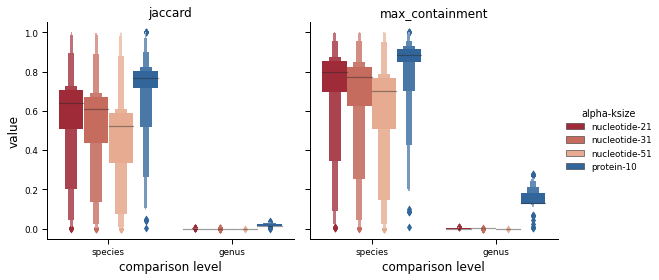

In [211]:
allprotnucl_colors = nucl_colors
allprotnucl_colors.update(protein_colors)
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12}):
    g = sns.catplot(data=nuclprotMelt,kind="boxen",x = "comparison_level", y='comparison_value', col="comparison_type",hue="alpha-ksize",palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors.keys(),height=4)
    #g.map(sns.boxenplot, "comparison_level", 'comparison_value')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    #g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    #for ax in g.fig.axes:
    #    ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    #g.fig.tight_layout()
    #g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("comparison level", "value")
g.savefig("pseudomonas_jaccard_vs_containment_prot10.pdf")
g.savefig("pseudomonas_jaccard_vs_containment_prot10.png")

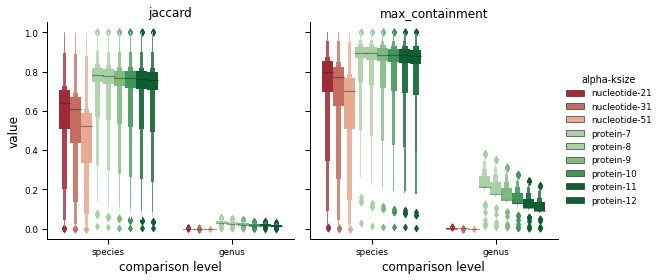

In [216]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12}):
    g = sns.catplot(data=nuclprotMelt,kind="boxen",x = "comparison_level", y='comparison_value', col="comparison_type",hue="alpha-ksize",palette=pnfull_colors, order=rankorder, hue_order=pnfull_colors.keys(),height=4)
    #g.map(sns.boxenplot, "comparison_level", 'comparison_value')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    #g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    #for ax in g.fig.axes:
    #    ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    #g.fig.tight_layout()
    #g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("comparison level", "value")
g.savefig("pseudomonas_jaccard_vs_containment.pdf")
g.savefig("pseudomonas_jaccard_vs_containment.png")

In [212]:
nuclprotMelt

,comparison_name,comparison_level,ksize,alphabet,scaled,alpha-ksize,comparison_type,comparison_value
0,GCF_004124255.1__x__GCF_001036355.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000483
1,GCF_004124255.1__x__GCF_012986535.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000486
2,GCF_004124255.1__x__GCF_012986525.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000484
3,GCF_004124255.1__x__GCF_012986465.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000479
4,GCF_004124255.1__x__GCF_009498775.1,genus,31,nucleotide,1000,nucleotide-31,jaccard,0.000645
...,...,...,...,...,...,...,...,...
353785,GCF_016337345.1__x__GCF_014062085.1,species,8,protein,100,protein-8,max_containment,0.860796
353786,GCF_902807105.1__x__GCF_003975605.1,species,8,protein,100,protein-8,max_containment,0.895651
353787,GCF_016337345.1__x__GCF_009932375.1,species,8,protein,100,protein-8,max_containment,0.813509
353788,GCF_902807105.1__x__GCF_003975615.1,species,8,protein,100,protein-8,max_containment,0.844895


In [213]:
proteinDF

,comparison_name,comparison_level,alphabet,ksize,scaled,jaccard,max_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCF_004124255.1__x__GCF_001036355.1,genus,hp,42,100,0.008271,0.064342,2409,16487,155,hp-42
1,GCF_004124255.1__x__GCF_012986535.1,genus,hp,42,100,0.017954,0.139477,2409,16641,336,hp-42
2,GCF_004124255.1__x__GCF_012986525.1,genus,hp,42,100,0.017547,0.138232,2409,16902,333,hp-42
3,GCF_004124255.1__x__GCF_012986465.1,genus,hp,42,100,0.017352,0.138647,2409,17173,334,hp-42
4,GCF_004124255.1__x__GCF_009498775.1,genus,hp,42,100,0.018704,0.135741,2409,15401,327,hp-42
...,...,...,...,...,...,...,...,...,...,...,...
19650,GCF_016337345.1__x__GCF_014062085.1,species,hp,35,100,0.670535,0.850085,14068,15726,11959,hp-35
19651,GCF_902807105.1__x__GCF_003975605.1,species,hp,35,100,0.731556,0.873392,18006,16871,14735,hp-35
19652,GCF_016337345.1__x__GCF_009932375.1,species,hp,35,100,0.637065,0.798052,14068,14782,11227,hp-35
19653,GCF_902807105.1__x__GCF_003975615.1,species,hp,35,100,0.681095,0.817950,18006,18346,14728,hp-35
